In [1]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')

In [5]:
data.shape

(76020, 371)

In [6]:
X = data.drop('TARGET',axis=1)
Y = data['TARGET']

In [7]:
X.shape, Y.shape

((76020, 370), (76020,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Constant feature removal

In [9]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [10]:
constant_filter.get_support().sum() # number of features left after removing the constant features

332

In [11]:
constant_list = [not temp for temp in constant_filter.get_support()]

In [12]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
       'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [13]:
x_train.shape, x_test.shape

((60816, 370), (15204, 370))

In [14]:
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [15]:
x_train_filter.shape, x_test_filter.shape

((60816, 332), (15204, 332))

**Removal of Quasi constant features**

In [16]:
# These features have same value for very large value of the subset of the data

In [17]:
#Widely used is 0.01 variance i.e 1% of non-similarity i.e 99% similar data

In [18]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [19]:
quasi_constant_filter.get_support().sum()

267

In [20]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [21]:
x_train_quasi_filter.shape, x_test_quasi_filter.shape

((60816, 267), (15204, 267))

**Remove duplicate features**

In [22]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [23]:
type(x_train_T)

numpy.ndarray

In [24]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [25]:
x_train_T.shape, x_test_T.shape

((267, 60816), (267, 15204))

In [26]:
x_train_T.duplicated().sum()

16

In [27]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [28]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [29]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [30]:
x_train_unique.shape, x_test_unique.shape

((60816, 251), (15204, 251))

In [31]:
x_train.shape, x_test.shape

((60816, 370), (15204, 370))

**Build a model and compare performance**

In [32]:
def run_random_forest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [33]:
%%time
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set:  0.9565903709550119
CPU times: user 29.6 s, sys: 93.7 ms, total: 29.7 s
Wall time: 15.4 s


In [34]:
%%time
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set:  0.9570507761115495
CPU times: user 34.2 s, sys: 122 ms, total: 34.3 s
Wall time: 17.7 s


In [35]:
corrmat = x_train_unique.corr()

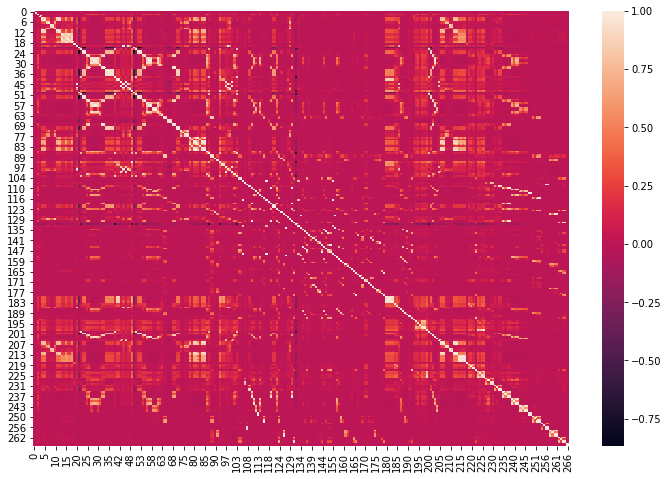

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)
#black are negative correlations and white are positive correlations

In [37]:
# select features which are more than 85% correlated
def get_correlation(data, treshold):
  corr_col = set()
  corrmat = data.corr()
  for i in range(len(corrmat.columns)): # since we compared 0 and 1, we do not need to compare 1 and 0
    for j in range(i):
      if abs(corrmat.iloc[i, j]) >treshold:
        colname = corrmat.columns[i]
        corr_col.add(colname)
  return corr_col

In [38]:
corr_features = get_correlation(x_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 45,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 77,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 93,
 95,
 97,
 98,
 99,
 100,
 102,
 103,
 105,
 114,
 117,
 119,
 121,
 125,
 129,
 130,
 134,
 145,
 146,
 147,
 154,
 155,
 156,
 173,
 177,
 179,
 180,
 181,
 182,
 183,
 198,
 200,
 201,
 202,
 203,
 206,
 207,
 209,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 223,
 225,
 226,
 229,
 230,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 245,
 246,
 247,
 249,
 252,
 253,
 256,
 257,
 258,
 260,
 261,
 264,
 265}

In [39]:
len(corr_features)

121

In [40]:
x_train_uncor = x_train_unique.drop(labels=corr_features, axis=1)
x_test_uncor = x_test_unique.drop(labels=corr_features, axis=1)

In [41]:
x_train_uncor.shape, x_test_uncor.shape

((60816, 130), (15204, 130))

In [42]:
%%time
run_random_forest(x_train_uncor, x_test_uncor, y_train, y_test)

Accuracy on test set:  0.9565903709550119
CPU times: user 20.8 s, sys: 84.5 ms, total: 20.9 s
Wall time: 10.9 s


**Feature grouping and feature importance**

In [43]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,40,41,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,1.000000,-0.003355,-0.003030,-0.002841,-0.000182,-0.002588,-0.007595,-0.007029,-0.007912,-0.007852,-0.008475,0.002161,-0.000653,0.000063,-0.001817,0.002369,-0.000408,-0.002124,0.001156,-0.007839,-0.002499,0.000476,0.006597,-0.001283,-0.003659,-0.006811,-0.009388,0.000340,-0.001052,-0.001003,0.000430,-0.001034,-0.008349,-0.010581,-0.004220,-0.003669,-0.003515,-0.004761,0.002834,0.000655,...,0.001364,0.002096,-0.005989,-0.002793,-0.000398,0.003126,-0.006177,-0.000951,-0.001467,-0.007374,-0.007690,-0.006420,-0.006628,-0.003069,0.000759,-0.002049,-0.002245,0.005660,0.002798,0.006358,0.007182,0.005055,0.005055,0.006218,-0.000693,0.008293,0.007985,-0.006205,0.000163,-0.006689,-0.008510,0.007144,0.007229,0.004687,0.004963,-0.003063,0.000216,-0.000161,0.001324,-0.000806
1,-0.003355,1.000000,-0.003084,0.001741,0.005201,0.006165,0.001469,0.001652,0.000509,0.000607,0.001267,0.005101,0.006083,0.002879,0.003313,0.004510,0.002889,0.003325,0.004582,0.000456,-0.000037,-0.008076,0.036344,0.007063,0.006578,0.010350,0.008390,0.009009,0.008131,0.007983,0.008875,0.005994,0.008080,0.007642,0.006295,0.006099,0.006446,0.005955,0.044819,0.009022,...,0.008125,0.004302,0.004213,0.003039,0.003974,0.001652,0.000746,0.002241,0.002229,0.004417,0.002632,0.005028,0.005060,0.005334,0.003027,0.005861,0.005809,0.002264,0.001348,0.002308,0.002325,0.000155,0.000155,0.000736,0.000376,0.000824,0.000902,0.000182,0.000156,0.000209,0.000250,0.000698,0.000527,0.000699,0.000734,0.000610,0.000464,0.000728,0.000764,0.000086
2,-0.003030,-0.003084,1.000000,0.041471,0.096276,0.102345,0.041124,0.047016,0.008269,0.009404,0.034383,0.090100,0.095113,0.084952,0.073854,0.105196,0.084834,0.073946,0.107536,0.014101,0.103280,-0.114921,-0.098961,0.114816,0.102701,0.266009,0.221463,0.297676,0.244787,0.242087,0.295928,0.153591,0.255330,0.246014,0.081719,0.094989,0.097644,0.079982,0.033653,0.153139,...,0.228318,0.185383,0.164722,0.128574,0.174722,0.049071,0.021038,0.059137,0.062044,0.177840,0.115143,0.197238,0.199541,0.190352,0.108184,0.211089,0.208339,0.118949,0.070926,0.117043,0.117591,0.003339,0.003339,0.046927,0.024240,0.044969,0.051555,0.006832,-0.003201,0.011852,0.012898,0.027392,0.019040,0.028012,0.028828,0.030518,0.019340,0.033365,0.033855,0.007068
3,-0.002841,0.001741,0.041471,1.000000,0.042038,0.035122,0.011186,0.011467,0.000543,0.002694,0.013159,0.041441,0.034040,0.022491,0.015570,0.036373,0.022361,0.015618,0.037356,-0.000141,0.017726,-0.001253,0.016993,0.003754,0.005346,0.043495,0.051051,0.026744,0.026466,0.026410,0.026637,0.018734,0.050236,0.050015,0.010910,0.010333,0.010283,0.010946,0.031193,0.042887,...,0.043842,0.007324,0.001593,0.023643,0.020511,0.005026,0.001240,0.007113,0.006611,0.014820,0.002070,0.025676,0.023984,-0.001295,-0.001381,0.011931,0.014989,-0.002801,-0.001564,0.000957,0.001992,-0.000213,-0.000213,-0.000963,-0.000494,-0.000784,-0.000978,-0.000250,-0.000213,0.004865,0.008071,-0.000815,-0.000679,-0.000410,-0.000386,0.002938,-0.000617,0.005650,0.007349,-0.000476
4,-0.000182,0.005201,0.096276,0.042038,1.000000,0.887231,0.358368,0.312597,0.034486,0.059867,0.260458,0.957183,0.853026,0.284913,0.251756,0.631805,0.284919,0.253183,0.653247,0.024727,0.245550,-0.224609,0.034821,0.224533,0.245219,0.013585,0.022381,-0.020589,-0.020091,-0.019818,-0.020568,0.019198,0.006233,0.004491,0.254989,0.247532,0.249855,0.252498,0.108687,0.277819,...,0.291186,0.019417,-0.005512,0.043415,0.030316,0.097742,0.086006,0.145165,0.134485,-0.006571,-0.005615,-0.007672,-0.007309,-0.016938,-0.001425,-0.019519,-0.019033,-0.004432,0.000246,-0.005700,-0.005747,-0.000868,-0.000868,0.008031,-0.000149,0.003141,0.004503,-0.001019,-0.000868,0.000453,0.001245,0.021807,0.017736,0.018021,0.019888,0.010000,0.007515,0.012358,0.011676,0.

In [83]:
corrdata = corrmat.abs().stack() # for each row, all the columns are stacked
corrdata

0    0      1.000000
     1      0.003355
     2      0.003030
     3      0.002841
     4      0.000182
              ...   
266  262    0.002935
     263    0.001634
     264    0.003590
     265    0.003259
     266    1.000000
Length: 63001, dtype: float64

In [84]:
corrdata = corrdata.sort_values(ascending=False)

In [85]:
corrdata

53   24     1.000000e+00
24   53     1.000000e+00
247  249    1.000000e+00
249  247    1.000000e+00
134  156    1.000000e+00
                ...     
120  176    4.178057e-07
146  265    1.781911e-07
265  146    1.781911e-07
136  265    1.781911e-07
265  136    1.781911e-07
Length: 63001, dtype: float64

In [87]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
corrdata

147  137    1.000000
137  147    1.000000
145  135    1.000000
135  145    1.000000
249  113    1.000000
              ...   
213  80     0.852486
125  90     0.852312
90   125    0.852312
180  41     0.850449
41   180    0.850449
Length: 466, dtype: float64

In [88]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['Features1', 'Features2', 'corr_value']

In [89]:
corrdata

,Features1,Features2,corr_value
0,147,137,1.000000
1,137,147,1.000000
2,145,135,1.000000
3,135,145,1.000000
4,249,113,1.000000
...,...,...,...
461,213,80,0.852486
462,125,90,0.852312
463,90,125,0.852312
464,180,41,0.850449


In [90]:
# grouped_feature_list = []
# correlated_groups_list = []
# for feature in corrdata.Features1.unique():
#   if feature not in grouped_feature_list:
#     correlated_block = corrdata[corrdata.Features1 == feature]
#     grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
#     print(correlated_block)
#     corr_data_list = list(correlated_block)
#     correlated_groups_list.append(corr_data_list)
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [91]:
correlated_groups_list

[   Features1  Features2  corr_value
 0        147        137         1.0,    Features1  Features2  corr_value
 2        145        135         1.0,    Features1  Features2  corr_value
 4        249        113         1.0,    Features1  Features2  corr_value
 6        134        127         1.0,    Features1  Features2  corr_value
 9        156        127         1.0,     Features1  Features2  corr_value
 11        247        113         1.0,     Features1  Features2  corr_value
 12        177        143         1.0,     Features1  Features2  corr_value
 14        117        106    0.999880
 16        117        155    0.999805,      Features1  Features2  corr_value
 18          23         52    0.999742
 216         23         53    0.931268
 219         23         24    0.931268
 404         23        201    0.867854
 421         23         21    0.865380,      Features1  Features2  corr_value
 22          29         58    0.999590
 95          29         28    0.981760
 116         

In [92]:
x_train.shape, x_train_uncor.shape

((60816, 370), (60816, 130))

In [93]:
for group in correlated_groups_list:
  print(group)
  print('test')

   Features1  Features2  corr_value
0        147        137         1.0
test
   Features1  Features2  corr_value
2        145        135         1.0
test
   Features1  Features2  corr_value
4        249        113         1.0
test
   Features1  Features2  corr_value
6        134        127         1.0
test
   Features1  Features2  corr_value
9        156        127         1.0
test
    Features1  Features2  corr_value
11        247        113         1.0
test
    Features1  Features2  corr_value
12        177        143         1.0
test
    Features1  Features2  corr_value
14        117        106    0.999880
16        117        155    0.999805
test
     Features1  Features2  corr_value
18          23         52    0.999742
216         23         53    0.931268
219         23         24    0.931268
404         23        201    0.867854
421         23         21    0.865380
test
     Features1  Features2  corr_value
22          29         58    0.999590
95          29         28    0.9

**Feature importance based on tree based classifiers**

In [95]:
important_features = []
for group in correlated_groups_list:
  features = list(group.Features1.unique()) + list(group.Features2.unique())
  rf = RandomForestClassifier(n_estimators=100,random_state=0)
  rf.fit(x_train_unique[features], y_train)
  importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
  importance.columns = ['features', 'importance']
  importance.sort_values(by= 'importance', ascending=False, inplace=True)
  feat = importance.iloc[0]
  important_features.append(feat)

In [99]:
important_features

,features,importance
1,137.0,0.551411
1,135.0,0.513098
1,113.0,0.610169
1,127.0,0.517241
1,127.0,0.517241
...,...,...
1,8.0,0.652687
1,7.0,0.577731
0,230.0,0.542106
1,229.0,0.545270


In [97]:
important_features = pd.DataFrame(important_features)

In [100]:
important_features.reset_index(inplace=True, drop=True)

In [101]:
important_features

,features,importance
0,137.0,0.551411
1,135.0,0.513098
2,113.0,0.610169
3,127.0,0.517241
4,127.0,0.517241
...,...,...
56,8.0,0.652687
57,7.0,0.577731
58,230.0,0.542106
59,229.0,0.545270


In [102]:
features_to_consider = set(important_features['features'])

In [103]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [104]:
features_to_discard = list(features_to_discard)

In [105]:
x_train_grouped_uncor = x_train_unique.drop(labels=features_to_discard, axis=1)
x_train_grouped_uncor.shape

(60816, 165)

In [106]:
x_test_grouped_uncor = x_test_unique.drop(labels=features_to_discard, axis=1)

In [107]:
%%time
run_random_forest(x_train_grouped_uncor, x_test_grouped_uncor, y_train, y_test)

Accuracy on test set:  0.9565903709550119
CPU times: user 24.5 s, sys: 69.8 ms, total: 24.5 s
Wall time: 12.7 s
